In [34]:
%env KERAS_BACKEND = tensorflow
%env matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential, Model,load_model
from keras.layers import Input
from keras.layers import Dense,Activation,Lambda,concatenate
from keras.optimizers import SGD

from keras.datasets import mnist

from keras.utils import np_utils

from keras import backend as K

(x_train,y_train),(x_test,y_test) =mnist.load_data()

x_train = x_train.reshape(60000,784)
x_test =x_test.reshape(10000,784)

x_train = x_train/255
x_test = x_test/255

'''
Autoencoder : encoder + decoder
    1. encoder : n -> m  降維
    2. decoder : m -> x 還原
    3. m : latent變數
    4. encoder 跟 decoder 對稱    
'''

#  ↙輸入輸出越像越好loss func↘
# 784 -> 100 -> 2 -> 100 -> 784
# [  encoder1,2 ][ decoder2,1 ]

enc_1 =Dense(100,activation='sigmoid')
enc_2 =Dense(2,activation='sigmoid')

dec_2 =Dense(100,activation='sigmoid')
dec_1 =Dense(784,activation='sigmoid')

x = Input(shape=(784,))

enc_x = enc_1(x)
h =enc_2(enc_x)

dec_x = dec_2(h)
x_reconstructed = dec_1(dec_x)


autoencoder = Model(x,x_reconstructed)
autoencoder.summary()

autoencoder.compile(loss='kullback_leibler_divergence',optimizer='Nadam')
#autoencoder.fit(x_train,x_train,batch_size=32,epochs=100)

autoencoder.load_weights('autoencoder_handwriting_model_weights.h5')

env: KERAS_BACKEND=tensorflow
env: matplotlib=inline
Model: "model_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_38 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_93 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_94 (Dense)             (None, 2)                 202       
_________________________________________________________________
dense_95 (Dense)             (None, 100)               300       
_________________________________________________________________
dense_96 (Dense)             (None, 784)               79184     
Total params: 158,186
Trainable params: 158,186
Non-trainable params: 0
_________________________________________________________________


Encoder : 
Model: "model_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_36 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_89 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_90 (Dense)             (None, 2)                 202       
Total params: 78,702
Trainable params: 78,702
Non-trainable params: 0
_________________________________________________________________
decoder : 
Model: "model_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_37 (InputLayer)        (None, 2)                 0         
_________________________________________________________________
dense_91 (Dense)             (None, 100)               300       
______________

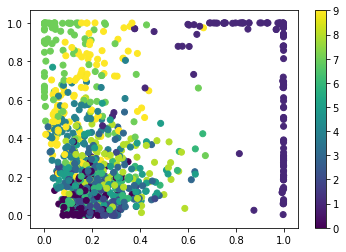

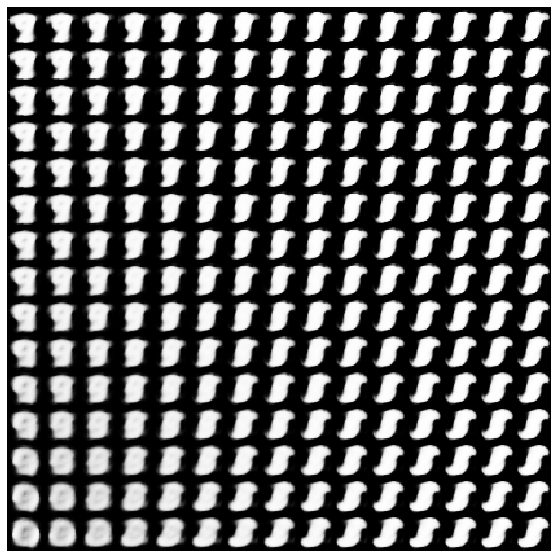

In [33]:
# break into two part and visualize

Encoder = Model(x,h)
print('Encoder : ')
Encoder.summary()

h_input = Input(shape=(2,))

Decoder = Model(h_input,dec_1(dec_2(h_input)))
print('decoder : ')
Decoder.summary()


# visualize encoder

idx = np.random.randint(x_train.shape[0])
print("第 %d 圖的latent 表示為 %s"%(idx,Encoder.predict(x_train[idx:idx+1])))
idices = np.random.randint(x_test.shape[0],size=1000)

latents = Encoder.predict(x_test[idices])
plt.scatter(latents[:,0],latents[:,1],c=y_test[idices])
plt.colorbar()
plt.show()
# 發現降維2維後分群視覺化效果不好

n=15
digit_size=28
figure = np.zeros((digit_size*n,digit_size*n))
grid_x = np.linspace(0.05,0.95,n)
grid_y = np.linspace(0.05,0.95,n)

for i,yi in enumerate(grid_x):
    for j,xi in enumerate(grid_y):
        z_sample = np.array([[xi,yi]])
        x_decoded = Decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size,digit_size)
        figure[(n-i-1)*digit_size:(n-i)*digit_size,j*digit_size:(j+1)*digit_size]=digit
        
plt.figure(figsize=(10,10))
plt.imshow(figure,cmap='Greys_r')
plt.axis('off')
plt.show()